<a href="https://colab.research.google.com/github/nimrashaheen001/Programming_for_AI/blob/main/implementation2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()
# Step 2: Unzip the uploaded file
import zipfile
import os

# Get the uploaded file name (automatically picks the first uploaded file)
zip_file = next(iter(uploaded))  # e.g., 'alzheimers.zip'

# Create a directory to extract files into
extract_dir = 'unzipped_dataset'
os.makedirs(extract_dir, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f"Files extracted to: {extract_dir}")

Saving shortdataset.zip to shortdataset.zip
Files extracted to: unzipped_dataset


In [2]:
import os

for root, dirs, files in os.walk('/content/unzipped_dataset'):
    level = root.replace('/content/unzipped_dataset', '').count(os.sep)
    indent = ' ' * 4 * level
    print(f"{indent}{os.path.basename(root)}/")
    subindent = ' ' * 4 * (level + 1)
    for f in files:
        print(f"{subindent}{f}")

import os
import shutil
import random

def balance_dataset_by_undersampling(source_dir, output_dir):
    """
    Balances a dataset by undersampling all classes to the size of the smallest class.

    - source_dir: original dataset directory where each class is a subfolder
    - output_dir: directory to save the balanced dataset
    """
    # Create output directory
    os.makedirs(output_dir, exist_ok=True)

    # Get class folders
    class_dirs = [d for d in os.listdir(source_dir) if os.path.isdir(os.path.join(source_dir, d))]

    # Count images per class
    class_counts = {}
    for class_dir in class_dirs:
        path = os.path.join(source_dir, class_dir)
        images = [f for f in os.listdir(path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
        class_counts[class_dir] = len(images)

    # Determine minimum number of images
    min_count = min(class_counts.values())
    print(f"Balancing to {min_count} images per class.")

    # Copy randomly selected images to output_dir
    for class_dir in class_dirs:
        src_path = os.path.join(source_dir, class_dir)
        dest_path = os.path.join(output_dir, class_dir)
        os.makedirs(dest_path, exist_ok=True)

        images = [f for f in os.listdir(src_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
        selected = random.sample(images, min_count)

        for img in selected:
            shutil.copy(os.path.join(src_path, img), os.path.join(dest_path, img))

    print("Dataset balancing completed. Saved to:", output_dir)
# Define the path to your extracted dataset folders (after unzipping)
source_path = '/content/unzipped_dataset/shortdataset'  # Adjust if needed
balanced_path = 'balanced_dataset'

# Run balancing
balance_dataset_by_undersampling(source_path, balanced_path)



unzipped_dataset/
    shortdataset/
        MCI/
            OAS1_0028_MR1_mpr-1_119.jpg
            OAS1_0028_MR1_mpr-1_112.jpg
            OAS1_0028_MR1_mpr-1_107.jpg
            OAS1_0028_MR1_mpr-1_113.jpg
            OAS1_0028_MR1_mpr-1_115.jpg
            OAS1_0028_MR1_mpr-1_106.jpg
            OAS1_0028_MR1_mpr-1_110.jpg
            OAS1_0028_MR1_mpr-1_118.jpg
            OAS1_0028_MR1_mpr-1_120.jpg
            OAS1_0028_MR1_mpr-1_102.jpg
            OAS1_0028_MR1_mpr-1_101.jpg
            OAS1_0028_MR1_mpr-1_117.jpg
            OAS1_0028_MR1_mpr-1_126.jpg
            OAS1_0028_MR1_mpr-1_127.jpg
            OAS1_0028_MR1_mpr-1_100.jpg
            OAS1_0028_MR1_mpr-1_122.jpg
            OAS1_0028_MR1_mpr-1_114.jpg
            OAS1_0028_MR1_mpr-1_105.jpg
            OAS1_0028_MR1_mpr-1_108.jpg
            OAS1_0028_MR1_mpr-1_116.jpg
            OAS1_0028_MR1_mpr-1_125.jpg
            OAS1_0028_MR1_mpr-1_104.jpg
            OAS1_0028_MR1_mpr-1_123.jpg
            OAS1_0028_MR1_mpr-1

In [5]:
import os
import shutil
import random

def split_dataset_jpg(source_dir, train_dir, test_dir, split_ratio=0.8):
    if not os.path.exists(source_dir):
        print(f"❌ Source directory not found: {source_dir}")
        return

    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(test_dir, exist_ok=True)

    class_dirs = [d for d in os.listdir(source_dir) if os.path.isdir(os.path.join(source_dir, d))]

    if not class_dirs:
        print("❌ No class folders found in source directory.")
        return

    for class_name in class_dirs:
        class_path = os.path.join(source_dir, class_name)
        images = [f for f in os.listdir(class_path) if f.lower().endswith('.jpg')]

        if not images:
            print(f"⚠️ No .jpg files found in {class_name}. Skipping.")
            continue

        print(f"📦 Splitting class '{class_name}' with {len(images)} JPG images...")

        random.shuffle(images)
        split_idx = int(len(images) * split_ratio)
        train_imgs = images[:split_idx]
        test_imgs = images[split_idx:]

        train_class_dir = os.path.join(train_dir, class_name)
        test_class_dir = os.path.join(test_dir, class_name)
        os.makedirs(train_class_dir, exist_ok=True)
        os.makedirs(test_class_dir, exist_ok=True)

        for img in train_imgs:
            shutil.copy(os.path.join(class_path, img), os.path.join(train_class_dir, img))
        for img in test_imgs:
            shutil.copy(os.path.join(class_path, img), os.path.join(test_class_dir, img))

    print("✅ JPG dataset successfully split into train/test.")


def print_split_summary(base_dir):
    print(f"\n📂 Dataset Summary for: {base_dir}")
    for split in ['train', 'test']:
        split_dir = os.path.join(base_dir, split)
        print(f"\n📁 {split.upper()} SET:")
        if not os.path.exists(split_dir):
            print("   (Directory not found)")
            continue
        for class_name in os.listdir(split_dir):
            class_path = os.path.join(split_dir, class_name)
            if os.path.isdir(class_path):
                count = len([f for f in os.listdir(class_path) if f.lower().endswith('.jpg')])
                print(f"   - {class_name}: {count} .jpg files")


# ✅ STEP 1: Run the split
split_dataset_jpg(
    source_dir='/content/balanced_dataset',        # <- your folder of classed JPGs
    train_dir='dataset_split_jpg/train',
    test_dir='dataset_split_jpg/test',
    split_ratio=0.8
)

# ✅ STEP 2: Print the summary
print_split_summary('dataset_split_jpg')


📦 Splitting class 'MCI' with 28 JPG images...
📦 Splitting class 'AD' with 28 JPG images...
📦 Splitting class 'CN' with 28 JPG images...
✅ JPG dataset successfully split into train/test.

📂 Dataset Summary for: dataset_split_jpg

📁 TRAIN SET:
   - MCI: 22 .jpg files
   - AD: 22 .jpg files
   - CN: 22 .jpg files

📁 TEST SET:
   - MCI: 6 .jpg files
   - AD: 6 .jpg files
   - CN: 6 .jpg files


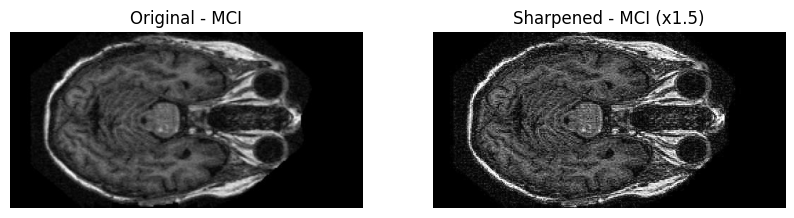

✅ All train images sharpened and saved to: sharpened_dataset_jpg/train


In [8]:
import os
import cv2
import shutil
import matplotlib.pyplot as plt

def sharpen_mri_train_set(input_train_dir, output_train_dir, sharpening_strength=1.5):
    """
    Applies Laplacian sharpening with adjustable strength.
    Saves sharpened images and shows one before/after comparison.
    """
    if os.path.exists(output_train_dir):
        shutil.rmtree(output_train_dir)
    os.makedirs(output_train_dir)

    example_image_shown = False

    for class_name in os.listdir(input_train_dir):
        class_path = os.path.join(input_train_dir, class_name)
        if not os.path.isdir(class_path):
            continue

        output_class_path = os.path.join(output_train_dir, class_name)
        os.makedirs(output_class_path, exist_ok=True)

        for img_name in os.listdir(class_path):
            if img_name.lower().endswith('.jpg'):
                img_path = os.path.join(class_path, img_name)
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

                # Apply Laplacian with stronger sharpening
                laplacian = cv2.Laplacian(img, cv2.CV_64F)
                sharpened = cv2.convertScaleAbs(img - sharpening_strength * laplacian)

                # Save sharpened image
                out_path = os.path.join(output_class_path, img_name)
                cv2.imwrite(out_path, sharpened)

                # Show one before/after example
                if not example_image_shown:
                    plt.figure(figsize=(10, 5))
                    plt.subplot(1, 2, 1)
                    plt.imshow(img, cmap='gray')
                    plt.title(f"Original - {class_name}")
                    plt.axis('off')

                    plt.subplot(1, 2, 2)
                    plt.imshow(sharpened, cmap='gray')
                    plt.title(f"Sharpened - {class_name} (x{sharpening_strength})")
                    plt.axis('off')

                    plt.show()
                    example_image_shown = True

    print("✅ All train images sharpened and saved to:", output_train_dir)

sharpen_mri_train_set(
    input_train_dir='/content/dataset_split_jpg/train',
    output_train_dir='sharpened_dataset_jpg/train',
    sharpening_strength=1.5  # Try 1.0, 1.5, or 2.0 for stronger edges
)

